# **Presentacion del proyecto**
---
## **Modelo de prediccion del impacto de Bitcoin en las Altcoins**

Bitcoin, Como la criptomoneda líder, a menudo establece las tendencias del mercado, impactando significativamente los precios de otras criptomonedas (Altcoins). Utilizando datos históricos, este estudio busca comprender y cuantificar la relación entre Bitcoin y diversas altcoins para construir un modelo que prediga cambios en los precios de estas últimas.

La volatilidad y la naturaleza del mercado de criptomonedas presentan desafíos y oportunidades para la predicción de precios. Dado que Bitcoin tiende a liderar el mercado, comprender su influencia sobre las altcoins puede proporcionar valiosas herramientas predictivas para la toma de decisiones en trading y análisis de riesgos.

Este proyecto está dirigido a analistas financieros y traders de criptomonedas interesados en el mercado de criptomonedas. También es relevante para investigadores que estudian las interrelaciones entre diferentes criptomonedas.

### **Contexto Comercial y analitico**

El mercado de criptomonedas, liderado por Bitcoin, influye significativamente en el precio de las altcoins. Para traders y analistas financieros, predecir estas variaciones es esencial para maximizar retornos y reducir riesgos. Este proyecto aborda este desafío, desarrollando un modelo predictivo que utiliza datos históricos de Bitcoin para predecir el impacto en los precios de las altcoins. Desde una perspectiva analítica, se aplican técnicas como regresión lineal para identificar patrones de correlación, facilitando decisiones comerciales más informadas.

### **Hipótesis a Resolver**

A partir de ciertas caracterisiticas presentadas en el movimiento del Bitcoin, es posible estimar fluctuaciones porcentuales positivas o negativas considerables en el precio de las Altcoins

### **Objetivo**

El objetivo principal del proyecto es desarrollar un modelo de machine learning que pueda estimar un porcentaje de fluctuacion considerables en el precio de las altcoins basándose en diversas características del comportamiento del precio del Bitcoin.

Para lograr este objetivo, podriamos Identificar las altcoins cuya relación con Bitcoin es más fuerte a travez de graficas de series temporales para visualizar tendencias y patrones y utilizar un analisis de correlación para mejorar la precisión del modelo.

Los  modelos a considerar son Regresion Lineal, para una realcion simple y directa entre el precio de bitcoin y las altoins, o modelos basados en machine learning como Random Forest para capturar relaciones mas comprejas y no lineales.

# **Lectura de Datos**
---

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/datascience/datascience1/Entrega1/historical.csv'

data = pd.read_csv(file_path)
data.head(10)

Mounted at /content/drive


,date,coin_id,cmc_rank,market_cap,price,open,high,low,close,time_high,time_low,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,circulating_supply,total_supply,max_supply,num_market_pairs
0,2013-04-28,1,1,1.488567e+09,134.210022,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.639231,NaN,NaN,1.109132e+07,1.109132e+07,21000000.0,NaN
1,2013-04-28,2,2,7.463702e+07,4.348405,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.799273,NaN,NaN,1.716423e+07,1.716423e+07,84000000.0,NaN
2,2013-04-28,5,3,7.250187e+06,0.386525,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.934763,NaN,NaN,1.875736e+07,1.875736e+07,NaN,NaN
3,2013-04-28,3,4,5.995997e+06,1.107233,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.050503,NaN,NaN,5.415300e+06,5.415300e+06,NaN,NaN
4,2013-04-28,4,5,1.503099e+06,0.646892,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.609159,NaN,NaN,2.323570e+06,2.323570e+06,42000000.0,NaN
5,2013-04-28,7,6,1.424087e+06,0.000326,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.461694,NaN,NaN,4.366620e+09,4.366620e+09,NaN,NaN
6,2013-04-28,6,7,1.162266e+06,4.246405,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.138190,NaN,NaN,2.737059e+05,2.737059e+05,NaN,NaN
7,2013-04-29,1,1,1.603769e+09,144.539993,134.44400,147.488007,134.000000,144.539993,13:15:01,05:20:01,0.0,1.229960,7.635530,NaN,1.109568e+07,1.109568e+07,21000000.0,NaN
8,2013-04-29,2,2,7.538893e+07,4.383898,4.36676,4.573600,4.225640,4.383900,13:15:01,19:25:02,0.0,0.167640,0.920718,NaN,1.719678e+07,1.719678e+07,84000000.0,NaN
9,2013-04-29,5,3,7.673908e+06,0.408861,0.38720,0.424765,0.377908,0.408861,13:15:03,04:05:04,0.0,-1.226470,NaN,NaN,1.876901e+07,1.876901e+07,NaN,NaN


In [ ]:
data.tail()

,date,coin_id,cmc_rank,market_cap,price,open,high,low,close,time_high,time_low,volume_24h,percent_change_1h,percent_change_24h,percent_change_7d,circulating_supply,total_supply,max_supply,num_market_pairs
4441967,2021-07-31,11062,5889,0.0,0.000012,0.000011,0.000012,0.000011,0.000012,23:29:14,00:08:12,0.0,-0.029532,5.182682,0.0,0.0,1.000000e+11,1.000000e+11,2.0
4441968,2021-07-31,11092,5890,0.0,0.073408,0.074141,0.076020,0.068015,0.073408,00:30:22,09:59:17,0.0,2.720558,-1.000309,0.0,0.0,2.000000e+09,2.000000e+09,1.0
4441969,2021-07-31,11095,5891,0.0,840.045674,846.683775,848.164610,825.270758,840.045674,00:02:17,14:09:28,0.0,-0.252488,-0.710247,0.0,0.0,0.000000e+00,NaN,1.0
4441970,2021-07-31,11099,5892,0.0,0.043440,0.041314,0.044082,0.040101,0.043440,21:59:14,05:33:32,0.0,-0.597312,5.359804,0.0,0.0,0.000000e+00,NaN,1.0
4441971,2021-07-31,11101,5893,0.0,8.212782,8.173956,8.272339,7.954592,8.212782,22:54:17,06:38:14,0.0,-0.517666,0.537436,0.0,0.0,0.000000e+00,NaN,1.0


In [ ]:
data.shape

(4441972, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441972 entries, 0 to 4441971
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   coin_id             int64  
 2   cmc_rank            int64  
 3   market_cap          float64
 4   price               float64
 5   open                float64
 6   high                float64
 7   low                 float64
 8   close               float64
 9   time_high           object 
 10  time_low            object 
 11  volume_24h          float64
 12  percent_change_1h   float64
 13  percent_change_24h  float64
 14  percent_change_7d   float64
 15  circulating_supply  float64
 16  total_supply        float64
 17  max_supply          float64
 18  num_market_pairs    float64
dtypes: float64(14), int64(2), object(3)
memory usage: 643.9+ MB


In [ ]:
data.columns

Index(['date', 'coin_id', 'cmc_rank', 'market_cap', 'price', 'open', 'high',
       'low', 'close', 'time_high', 'time_low', 'volume_24h',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'circulating_supply', 'total_supply', 'max_supply', 'num_market_pairs'],
      dtype='object')

## **Descripcion de Variables**

* **date**: fecha
* **coin_id**: moneda
* **cmc_rank**: rango de la moneda segun creador del dataset
* **market_cap**: capitalizacion de mercado
* **price**: precio
* **open**:  precio de apertura
* **high**: maximo precio alcanzado
* **low**: minimo precio alcanzado
* **close**: precio de cierre
* **time_high**: tiempo en maximos
* **time_low**: tiempo en minimos
* **volume_24h**: volumen transaccionado en 24hs
* **percent_change_1h**: cambio en 1h
* **percent_change_24h**: cambio en 24hs
* **percent_change_7d**: cambio en 7 dias
* **circulating_supply**: cantidad de monedas en circulacion
* **total_supply**: total de monedas existentes
* **max_supply**: cantidad maxima de monedas que existieron
* **num_market_pairs**: numero de pares de mercado en todos los exchanges que negocian cada moneda



# **Limpieza y transformacion de datos**
---

In [ ]:
data['date'] = pd.to_datetime(data['date']) #convierto los valores de la columna date a valores tipo fecha

df_filtrado = data[(data['date'] >= '2015-01-01') & (data['date'] <= '2021-12-31')] #filtro los valores entre 2015 a 2021

btc_df = df_filtrado[df_filtrado['coin_id'] == 1] #aislo btc
xrp_df = df_filtrado[df_filtrado['coin_id'] == 52] #bajo marketcap
eth_df = df_filtrado[df_filtrado['coin_id'] == 1027] #alto marketcap
ada_df = df_filtrado[df_filtrado['coin_id'] == 2010] #bajo marketcap

#df_modelo = pd.concat([xrp_df, eth_df, btc_df, ada_df]) #defino un dataframe con las 4 variables a evaluar

En este caso filtre los valores entre los años de 2015 a 2021 ya que el mercado de criptomonedas empezo a tener mas relevancia durante estos años.

**valores nulos**

In [ ]:
df_filtrado.isnull().sum()

,0
date,0
coin_id,0
cmc_rank,0
market_cap,536180
price,0
open,39924
high,39924
low,39924
close,39924
time_high,47227


como se puede obsevar hay una gran cantidad de valores nulos, por ende para realizar futuros calculos procedo eliminar del dataset todas las filas con estos valores, siendo que esta cantidad no representa una cantidad significativa de datos para el proyecto, pero excluyo las columnas irrelevantes porque de no ser asi eliminaria una mayor cantidad de datos afectando el resultado futuro

In [ ]:
# defino las columnas irrelevantes al proyecto
exclude_columns = ['max_supply', 'num_market_pairs']

# creo dataframes de criptos relevantes para luego realizar un analisis exploratorio de datos de manera rapida y sencilla
btc_df = btc_df.dropna(subset=[col for col in btc_df.columns if col not in exclude_columns])
xrp_df = xrp_df.dropna(subset=[col for col in xrp_df.columns if col not in exclude_columns])
eth_df = eth_df.dropna(subset=[col for col in eth_df.columns if col not in exclude_columns])
ada_df = ada_df.dropna(subset=[col for col in ada_df.columns if col not in exclude_columns])

# Exploracion de datos
---

## Volatilidad de Bitcoin y Altcoins en 2020 y 2021
Para la primera exploracion de datos realizo un estudio de la volatilidad del precio de algunas altcoins contra bitcoin, elegi 3 altcoins para llevar a cabo la exploracion, XRP y ADA que son de baja capitalizacion de mercado, y ETH que es la altcoin con mayor capitalizacion de mercado, y la criptomoneda con esta variable mas alta despues de bitcoin.

para realizar este estudio tome los valores absolutos de la volatilidad del precio en 24hs ya que mi interes no es la direccion del precio sino cuanto variacion hubo.

limite el estudio a 2021 y 2020 para no tener una excesiva cantidad de datos y poder realizar un estudio mas preciso sin sesgar los resultados.

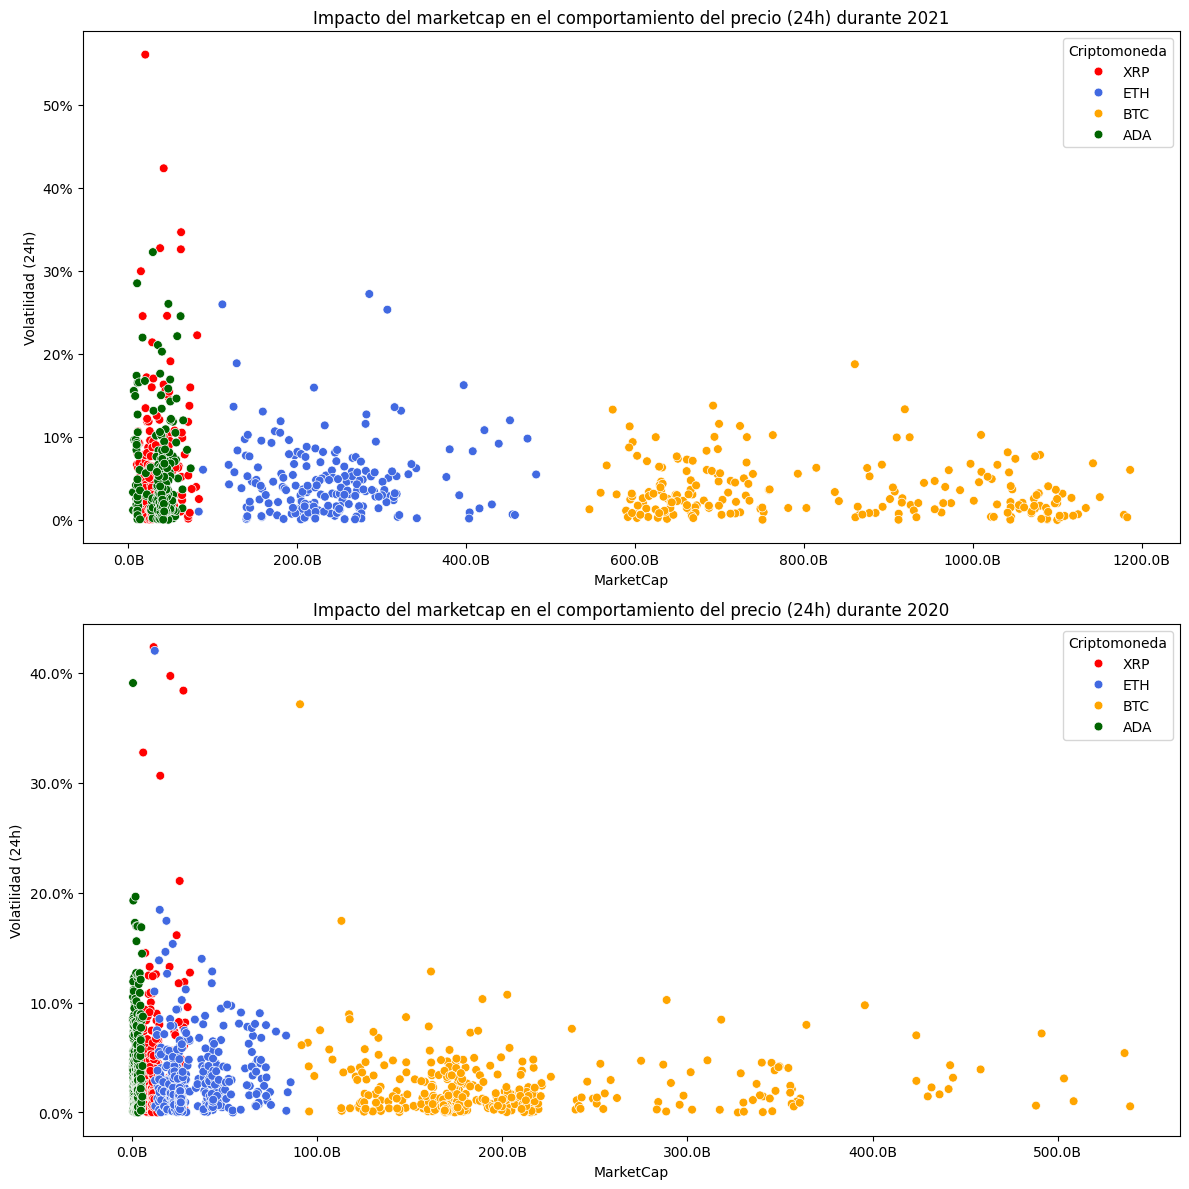

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter

dftest = pd.concat([xrp_df, eth_df, btc_df, ada_df]) #defino un dataframe con las 4 variables a evaluar

dftest['percent_change_24h'] = dftest['percent_change_24h'].abs() #convierto a valor absoluto los cambios en 24hs para no tener valores negativos de volatilidad (que solo indican la tendencia)

dftest['date'] = pd.to_datetime(dftest['date']) #le doy formato de fecha a la columna fecha
dftest2 = dftest[dftest['date'].dt.year == 2021].copy() #filtro el dataframe para estudiar la hipotesis solo en el año 2021
dftest3 = dftest[dftest['date'].dt.year == 2020].copy() #filtro el dataframe para estudiar la hipotesis solo en el año 2020

coin_id_to_name = { #asigno nombre a las categorias
    1: 'BTC',
    1027: 'ETH',
    2010: 'ADA',
    52: 'XRP'
}

dftest2['coin_id'] = dftest2['coin_id'].map(coin_id_to_name) #mapeo los id a los nombres dados
dftest3['coin_id'] = dftest3['coin_id'].map(coin_id_to_name) #mapeo los id a los nombres dados

palette = { #asigno colores para mejor diferenciacion
    'BTC': 'orange',
    'ETH': 'royalblue',
    'ADA': 'darkgreen',
    'XRP': 'red'
}

def billions(x, pos): #funcion para el formateo del eje X para mejor legilibilidad
    """ Convertir el valor a billones """
    return f'{x * 1e-9:.1f}B'

fig, axs = plt.subplots(2, 1, figsize=(12, 12)) #figura con 2 subplots verticales

# primer subplot: percent_change_24h
sns.scatterplot(data=dftest2, x='market_cap', y='percent_change_24h', hue='coin_id', s=40, palette=palette, ax=axs[0])
axs[0].xaxis.set_major_formatter(FuncFormatter(billions))
axs[0].yaxis.set_major_formatter(PercentFormatter())
axs[0].set_xlabel('MarketCap')
axs[0].set_ylabel('Volatilidad (24h)')
axs[0].set_title('Impacto del marketcap en el comportamiento del precio (24h) durante 2021')
axs[0].legend(title='Criptomoneda')

# segundo subplot: percent_change_1h
sns.scatterplot(data=dftest3, x='market_cap', y='percent_change_24h', hue='coin_id', s=40, palette=palette, ax=axs[1])
axs[1].xaxis.set_major_formatter(FuncFormatter(billions))
axs[1].yaxis.set_major_formatter(PercentFormatter())
axs[1].set_xlabel('MarketCap')
axs[1].set_ylabel('Volatilidad (24h)')
axs[1].set_title('Impacto del marketcap en el comportamiento del precio (24h) durante 2020')
axs[1].legend(title='Criptomoneda')

plt.tight_layout()
plt.show()

###analisis y observaciones:
realizadas las graficas se puede observar claramente y en ambos periodos temporales como la voldatilidad del precio de las altcoins esta relacionado directamente al marketcap de la misma, siendo inversamente proporcional, ya que mientras el marketcap es menor, la volatilidad aumenta.

este analisis aunque no indica una relacion directa del impacto de la volatilidad de bitcoin en la volatilidad en las altcoins estudiadas presta informacion para llevar a cabo su analisis de otra manera

## Relacion del precio y volatilidad de Bitcoin con las Altcoins

en ete caso de estudio, y a partir de los resultados del analisis previo, se procede a realizar una matriz de correlacion para analizar que tan fuerte es la relacion entre Bitcoin y las Altoins.

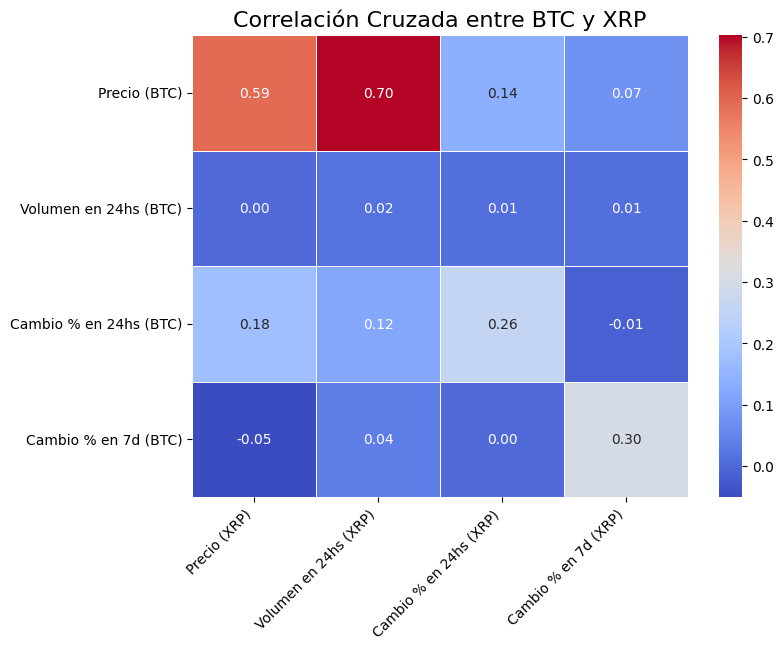

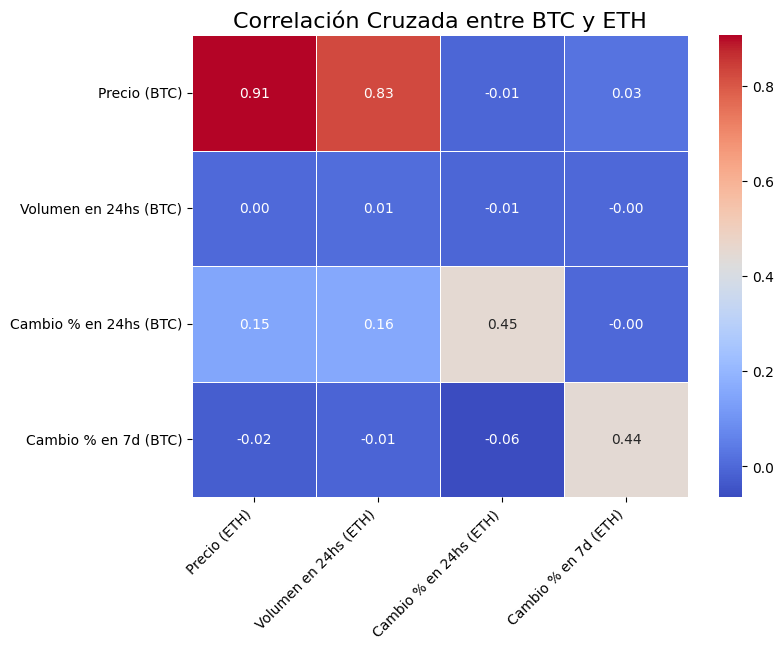

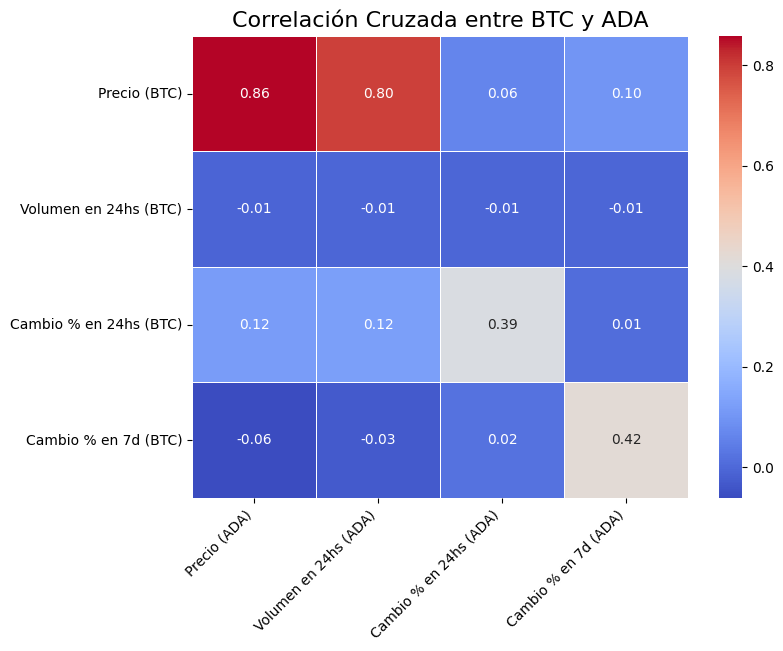

In [ ]:
# Función para generar y graficar la matriz de correlación
def plot_correlation_heatmap(crypto_1, crypto_2, label_1, label_2):
    # Renombrar columnas con etiquetas descriptivas
    crypto_1 = crypto_1.rename(columns={
        'price': f'Precio ({label_1})',
        'volume_24h': f'Volumen en 24hs ({label_1})',
        'percent_change_24h': f'Cambio % en 24hs ({label_1})',
        'percent_change_7d': f'Cambio % en 7d ({label_1})'
    })

    crypto_2 = crypto_2.rename(columns={
        'price': f'Precio ({label_2})',
        'volume_24h': f'Volumen en 24hs ({label_2})',
        'percent_change_24h': f'Cambio % en 24hs ({label_2})',
        'percent_change_7d': f'Cambio % en 7d ({label_2})'
    })

    # Combinar los DataFrames en función de la fecha
    merged_df = pd.merge(crypto_1, crypto_2, on='date')

    # Calcular la matriz de correlación para todas las columnas
    correlation_matrix = merged_df.corr()

    # Filtrar la matriz de correlación para obtener solo las correlaciones cruzadas
    labels_1 = [f'Precio ({label_1})', f'Volumen en 24hs ({label_1})', f'Cambio % en 24hs ({label_1})', f'Cambio % en 7d ({label_1})']
    labels_2 = [f'Precio ({label_2})', f'Volumen en 24hs ({label_2})', f'Cambio % en 24hs ({label_2})', f'Cambio % en 7d ({label_2})']
    filtered_corr = correlation_matrix.loc[labels_1, labels_2]

    # Crear la figura
    plt.figure(figsize=(8, 6))

    # Graficar el heatmap de la matriz de correlación filtrada
    sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

    # Configurar las etiquetas del eje x y y con rotación
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Configurar el título
    plt.title(f'Correlación Cruzada entre {label_1} y {label_2}', fontsize=16)

    # Mostrar la gráfica
    plt.show()

# Filtrar los datos para cada criptomoneda
crypto_1 = dftest[dftest['coin_id'] == 1][['date', 'price', 'volume_24h', 'percent_change_24h', 'percent_change_7d']]
crypto_52 = dftest[dftest['coin_id'] == 52][['date', 'price', 'volume_24h', 'percent_change_24h', 'percent_change_7d']]
crypto_1027 = dftest[dftest['coin_id'] == 1027][['date', 'price', 'volume_24h', 'percent_change_24h', 'percent_change_7d']]
crypto_2010 = dftest[dftest['coin_id'] == 2010][['date', 'price', 'volume_24h', 'percent_change_24h', 'percent_change_7d']]

# Graficar las correlaciones cruzadas
plot_correlation_heatmap(crypto_1, crypto_52, 'BTC', 'XRP')
plot_correlation_heatmap(crypto_1, crypto_1027, 'BTC', 'ETH')
plot_correlation_heatmap(crypto_1, crypto_2010, 'BTC', 'ADA')

###analisis y observaciones:
como resultado de esta matriz de correlacion, se puede observar una fuerte relacion entre el precio y el volumen transaccionado en 24hs entre bitcoin y las altcoins

# Preparacion del dataset para ingresar al modelo
---

en este apartado decido separar en 2 datasets la informacion de bitcoin y la de las altcoins, y armar un nuevo dataset donde cada altcoin contenta los valores relevantes sobre bitcoin a analizar para entrenar el modelo de manera correcta

In [ ]:

#separo el dataset en 2
btc_df = dftest[dftest['coin_id'] == 1].copy()
altcoin_df = dftest[dftest['coin_id'] != 1].copy()

# renombro colummnas de btc para no duplicar nombres de columnas
btc_df_renamed = btc_df.rename(columns={
    'volume_24h': 'volume_24h_btc',
    'price': 'price_btc',
    'percent_change_24h': 'percent_change_24h_btc'
})

# realizo el merge entre los datasets ubicando el mismo al final vinculados por fecha
altcoin_df = altcoin_df.merge(
    btc_df_renamed[['date', 'volume_24h_btc', 'price_btc', 'percent_change_24h_btc']],
    on='date',
    how='left'
)


altcoin_df.head()


,date,coin_id,cmc_rank,market_cap,price,open,high,low,close,time_high,...,percent_change_1h,percent_change_24h,percent_change_7d,circulating_supply,total_supply,max_supply,num_market_pairs,volume_24h_btc,price_btc,percent_change_24h_btc
0,2015-01-01,52,2,7.555592e+08,0.024390,0.024455,0.024455,0.024205,0.024390,00:04:04,...,-0.070055,0.124602,0.379661,3.097808e+10,9.999967e+10,1.000000e+11,NaN,8036547.0,314.248962,1.335060
1,2015-01-02,52,2,7.533416e+08,0.024319,0.024377,0.024423,0.024309,0.024318,03:09:04,...,0.020479,0.286219,-3.695670,3.097808e+10,9.999967e+10,1.000000e+11,NaN,7860647.0,315.032440,0.255108
2,2015-01-03,52,2,6.847975e+08,0.022106,0.024297,0.024317,0.022106,0.022106,00:29:04,...,-0.686219,9.068960,-8.041070,3.097808e+10,9.999967e+10,1.000000e+11,NaN,33054436.0,281.082153,10.784400
3,2015-01-04,52,2,5.863507e+08,0.018928,0.022100,0.022142,0.018828,0.018928,00:49:04,...,0.423183,14.592200,-20.645800,3.097808e+10,9.999967e+10,1.000000e+11,NaN,55629084.0,264.195343,7.046820
4,2015-01-05,52,2,6.293501e+08,0.020316,0.018943,0.020316,0.018890,0.020316,23:59:04,...,0.620360,7.337580,-16.206400,3.097808e+10,9.999967e+10,1.000000e+11,NaN,43962824.0,274.474152,3.637850


realizo una nueva limpieza de los valores para no tener luego fallas al entrenar el modelo

In [ ]:
altcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    6538 non-null   datetime64[ns]
 1   coin_id                 6538 non-null   int64         
 2   cmc_rank                6538 non-null   int64         
 3   market_cap              6537 non-null   float64       
 4   price                   6538 non-null   float64       
 5   open                    6535 non-null   float64       
 6   high                    6535 non-null   float64       
 7   low                     6535 non-null   float64       
 8   close                   6535 non-null   float64       
 9   time_high               6535 non-null   object        
 10  time_low                6535 non-null   object        
 11  volume_24h              6538 non-null   float64       
 12  percent_change_1h       6532 non-null   float64 

In [ ]:
altcoin_df.isnull().sum()

,0
date,0
coin_id,0
cmc_rank,0
market_cap,1
price,0
open,3
high,3
low,3
close,3
time_high,3


In [ ]:
altcoin_df = altcoin_df.dropna(subset=['percent_change_24h', 'volume_24h_btc', 'price_btc', 'percent_change_24h_btc'])

#Modelo
---
Elegi el modelo de RandomForest ya que es util para estudiar relaciones complejas y funciona bien con datos de alta dimensionalidad como es el presente dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = altcoin_df[['price', 'open', 'high', 'low', 'close', 'volume_24h',
                    'percent_change_1h','volume_24h_btc', 'price_btc', 'percent_change_24h_btc']] #defino variables dependientes
y = altcoin_df['percent_change_24h'] #defino mi variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

# evaluacion de modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Error cuadratico medio: {mse}')
print(f'Coeficiente de determinacion: {r2}')

Error cuadratico medio: 24.72165680149033
Coeficiente de determinacion: 0.39732772160821284


In [ ]:
#testeo del modelo
new_data = pd.DataFrame({
    'price': [100],
    'open': [98],
    'high': [102],
    'low': [95],
    'close': [101],
    'volume_24h': [1000000],
    'percent_change_1h': [0.5],
    'volume_24h_btc': [35546000],
    'price_btc': [59000],
    'percent_change_24h_btc': [5.3]
})
prediction = model.predict(new_data)
print(prediction)

[4.8277942]


##Concluciones del modelo:



Con un error cuadrático medio de 27,5 y un coeficiente de determinación de 0,39, el modelo muestra un desempeño moderado. El coeficiente de determinación podria sugerir que el modelo es útil pero todavía se puede mejorar.

Una observacion es que quizas una mayor cantidad de datos podria mejorar los valores en la evaluacion, aunque tanto ruido podria ser contraproducente y causar overfitting, tambien si no se lograran mejores valores podria ser un indicativo que el modelo no es capaz de identificar la complejidad del problema.

El modelo de Random Forest parece demostrar un rendimiento no muy bueno en la predicción de la variación del precio en 24 horas de las altcoins. Estos resultados sugieren que, aunque el modelo tiene cierta capacidad predictiva, todavía no es lo suficientemente preciso y podria estar capturando solo una fracción de la variabilidad.

Existe una alta probabilidad de que el modelo esté sufriendo de underfitting, ya que no está capturando suficientemente bien las relaciones en las variables dependientes. Para mejorar el modelo, se podrian ajustar los parámetros y considerar mas variables importantes lo que podría ayudar a reducir el error cuadratico medio y aumentar el R², mejorando la capacidad del modelo para predecir con mayor precisión la variable objetivo.

